In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
X = np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]])
y = np.array([0,1,1,0])

In [3]:
w = np.linalg.inv(X.T @ X) @ X.T @ y

In [4]:
w.shape

(3,)

In [5]:
X.shape

(4, 3)

In [6]:
y_pred = X@w

In [7]:
y_pred

array([0.5, 0.5, 0.5, 0.5])

In [46]:
lr = 0.15
L_list_epochs = []

w11_1 = np.random.random()
w12_1 = np.random.random()
b1_1 = np.random.random()

w21_1 = np.random.random()
w22_1 = np.random.random()
b2_1 = np.random.random()

w11_2 = np.random.random()
w12_2 = np.random.random()
b1_2 = np.random.random()

for epoch in range(1000):
  for sample in range(4):
    
    #print("Epoch nr: ", epoch)
    #print("Sample nr: ", sample)

    # Paso Forward
    
    z1_1 = w11_1 * X[sample,0] + w12_1 * X[sample,1] + b1_1 * X[sample,2]
    a1_1 = 1 / (1 + np.exp(-z1_1))

    z2_1 = w21_1 * X[sample,0] + w22_1 * X[sample,1] + b2_1 * X[sample,2]
    a2_1 = 1 / (1 + np.exp(-z2_1))

    z1_2 = w11_2 * a1_1 + w12_2 * a2_1 + b1_2 * 1
    
    L = np.power((y[sample]-z1_2),2)

    L_list_epochs.append(L)
    #print("y: ", y[sample])
    #print("yhat: ",z1_2)
    #print("L: ",L)

    # Paso Backward

    grad_b1_2 = -2 * (y[sample] - z1_2) * 1
    grad_w12_2 = -2 * (y[sample] - z1_2) * a2_1
    grad_w11_2 = -2 * (y[sample] - z1_2) * a1_1

    grad_b2_1 = -2 * (y[sample] - z1_2) * w12_2 * a2_1 * (1 - a2_1) * 1
    grad_w22_1 = -2 * (y[sample] - z1_2) * w12_2 * a2_1 * (1 - a2_1) * X[sample,1]
    grad_w21_1 = -2 * (y[sample] - z1_2) * w12_2 * a2_1 * (1 - a2_1) * X[sample,0]

    grad_b1_1 = -2 * (y[sample] - z1_2) * w11_2 * a1_1 * (1 - a1_1) * 1
    grad_w12_1 = -2 * (y[sample] - z1_2) * w11_2 * a1_1 * (1 - a1_1) * X[sample,1]
    grad_w11_1 = -2 * (y[sample] - z1_2) * w11_2 * a1_1 * (1 - a1_1) * X[sample,0]

    # Actualización de parámetros

    w11_1 = w11_1 - lr * grad_w11_1
    w12_1 = w12_1 - lr * grad_w12_1
    b1_1 = b1_1 - lr * grad_b1_1

    w21_1 = w21_1 - lr * grad_w21_1 
    w22_1 = w22_1 - lr * grad_w22_1
    b2_1 = b2_1 - lr * grad_b2_1

    w11_2 = w11_2 - lr * grad_w11_2
    w12_2 = w12_2 - lr * grad_w12_2
    b1_2 = b1_2 - lr * grad_b1_2


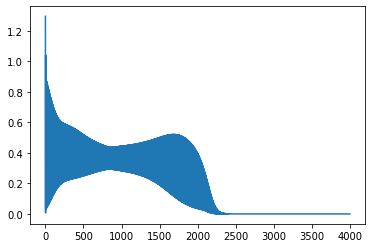

In [51]:
plt.plot(range(4000),L_list_epochs)

In [59]:
yhat = []
for sample in range(4):
  z1_1_new = w11_1 * X[sample,0] + w12_1 * X[sample,1] + b1_1 * X[sample,2]
  a1_1_new = 1 / (1 + np.exp(-z1_1_new))

  z2_1_new = w21_1 * X[sample,0] + w22_1 * X[sample,1] + b2_1 * X[sample,2]
  a2_1_new = 1 / (1 + np.exp(-z2_1_new))

  z1_2_new = w11_2 * a1_1_new + w12_2 * a2_1_new + b1_2 * 1
  yhat.append(z1_2_new)

In [60]:
yhat

[6.290967746735987e-12,
 0.9999999999963551,
 0.9999999999992355,
 1.8540724511240114e-13]

In [68]:
table = np.hstack([X,y.reshape(-1,1),np.array(yhat).reshape(-1,1)])

In [70]:
data = pd.DataFrame(data=table, columns=["X1","X2","b","y","yhat"])
data

,X1,X2,b,y,yhat
0,0.0,0.0,1.0,0.0,6.290968e-12
1,0.0,1.0,1.0,1.0,1.000000e+00
2,1.0,0.0,1.0,1.0,1.000000e+00
3,1.0,1.0,1.0,0.0,1.854072e-13


In [72]:
data["MSE"] = np.power((data.y - data.yhat),2)
data

,X1,X2,b,y,yhat,MSE
0,0.0,0.0,1.0,0.0,6.290968e-12,3.957628e-23
1,0.0,1.0,1.0,1.0,1.000000e+00,1.328502e-23
2,1.0,0.0,1.0,1.0,1.000000e+00,5.844596e-25
3,1.0,1.0,1.0,0.0,1.854072e-13,3.437585e-26
